# Análisis Exploratorio

In [1]:
import pandas as pd
from imblearn.combine import SMOTEENN

df = pd.read_csv("./Covid Data.csv")
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [3]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [4]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

## Preprocesamiento

In [5]:
# Cambiar DATE_DIED por 0 si es 9999/99/99 o 1 si es cualquier otro

def cambiar_fecha(fecha):
    fecha = str(fecha)
    if fecha == '9999-99-99':
        return 0
    else:
        return 1

df['DIED'] = df['DATE_DIED'].apply(cambiar_fecha)

df = df.drop('DATE_DIED', axis=1)

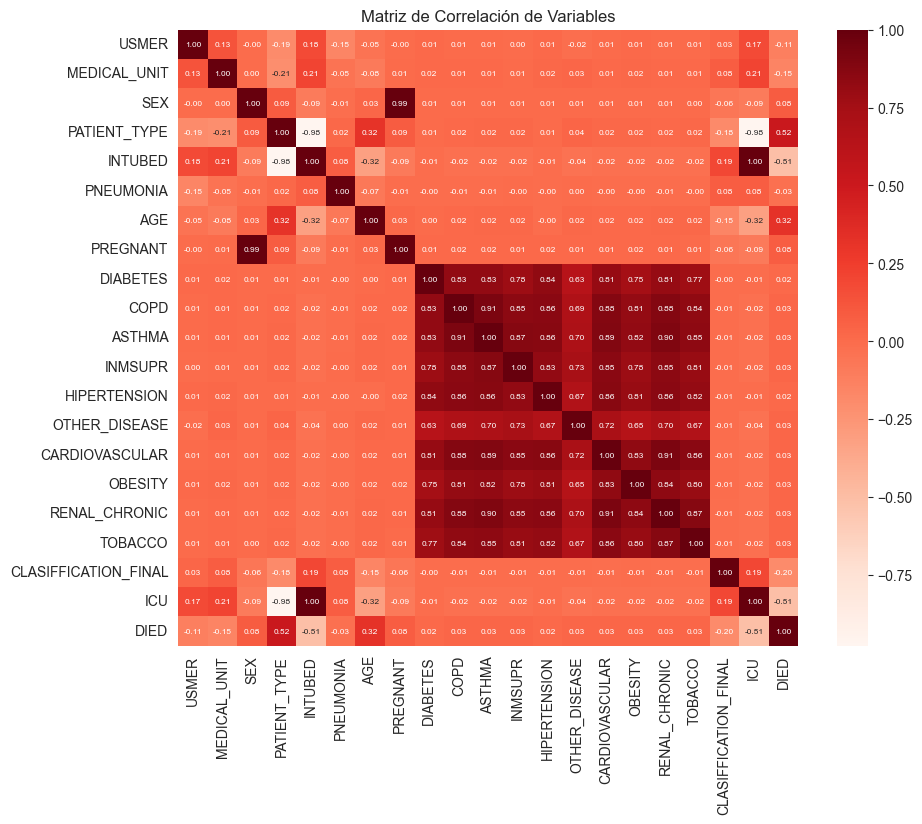

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, cmap='Reds', annot=True, fmt=".2f", annot_kws={'size': 6})
plt.title('Matriz de Correlación de Variables')
plt.show()

In [7]:
# Quitar ICU por ser una copia de INTUBED
df = df.drop('ICU', axis=1)

In [8]:
# Cambiar a booleanos y a None

def to_bool(num):
    if num == 1:
        return 1

    if num == 2:
        return 0

    return None

bool_cols = ['PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']

df[bool_cols] = df[bool_cols].map(to_bool)

In [9]:
# quitar resultados no concluyentes (CLASIFFICATION_FINAL)

rows_to_drop = df[df['CLASIFFICATION_FINAL'] == 4].index

df.drop(rows_to_drop, inplace=True)

In [10]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DIED
count,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,192114.000000,1.029461e+06,1.045453e+06,519721.000000,1.042121e+06,1.042454e+06,1.042479e+06,1.042054e+06,1.042352e+06,1.040423e+06,1.042381e+06,1.042424e+06,1.042450e+06,1.042237e+06,1.045453e+06,1.045453e+06
mean,1.631842e+00,8.973974e+00,1.499287e+00,8.092454e-01,0.174933,1.355214e-01,4.179397e+01,0.015606,1.195639e-01,1.440351e-02,3.021931e-02,1.356648e-02,1.557391e-01,2.692751e-02,1.987085e-02,1.528908e-01,1.808528e-02,8.067743e-02,5.309552e+00,7.345524e-02
std,4.823048e-01,3.724575e+00,4.999997e-01,3.928962e-01,0.379910,3.422798e-01,1.690858e+01,0.123947,3.244510e-01,1.191472e-01,1.711903e-01,1.156825e-01,3.626080e-01,1.618717e-01,1.395565e-01,3.598823e-01,1.332600e-01,2.723392e-01,1.882617e+00,2.608824e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,0.000000,0.000000e+00,3.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,0.000000,0.000000e+00,4.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,0.000000,0.000000e+00,5.300000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00
max,2.000000e+00,1.300000e+01,2.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.210000e+02,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00,1.000000e+00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045453 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   USMER                 1045453 non-null  int64  
 1   MEDICAL_UNIT          1045453 non-null  int64  
 2   SEX                   1045453 non-null  int64  
 3   PATIENT_TYPE          1045453 non-null  int64  
 4   INTUBED               192114 non-null   float64
 5   PNEUMONIA             1029461 non-null  float64
 6   AGE                   1045453 non-null  int64  
 7   PREGNANT              519721 non-null   float64
 8   DIABETES              1042121 non-null  float64
 9   COPD                  1042454 non-null  float64
 10  ASTHMA                1042479 non-null  float64
 11  INMSUPR               1042054 non-null  float64
 12  HIPERTENSION          1042352 non-null  float64
 13  OTHER_DISEASE         1040423 non-null  float64
 14  CARDIOVASCULAR        1042381 non-null 

In [12]:
df.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
INTUBED                 853339
PNEUMONIA                15992
AGE                          0
PREGNANT                525732
DIABETES                  3332
COPD                      2999
ASTHMA                    2974
INMSUPR                   3399
HIPERTENSION              3101
OTHER_DISEASE             5030
CARDIOVASCULAR            3072
OBESITY                   3029
RENAL_CHRONIC             3003
TOBACCO                   3216
CLASIFFICATION_FINAL         0
DIED                         0
dtype: int64

Tratar PREGNANT

In [13]:
df["PREGNANT"].describe()

count    519721.000000
mean          0.015606
std           0.123947
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: PREGNANT, dtype: float64

In [14]:
# PONER PREGNANT COMO FALSE SI ES HOMBRE

# Cambiar valores en col2 usando una función
df['PREGNANT'] = df.apply(lambda row: 0 if row['SEX'] == 2 else row['PREGNANT'], axis=1)

In [15]:
df.isnull().sum()["PREGNANT"]

np.int64(3751)

In [16]:
df["PREGNANT"].describe()

count    1.041702e+06
mean     7.786296e-03
std      8.789583e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: PREGNANT, dtype: float64

In [17]:
# Quitar INTUBED por alta cantidad de nulos y alta correlación con PATIENT_TYPE

df = df.drop('INTUBED', axis=1)

### Quitar nulos

In [18]:
#df.drop(df[df['PATIENT_TYPE'].isnull()].index, inplace=True)

#df.drop(df[df['PNEUMONIA'].isnull()].index, inplace=True)

#df.drop(df[df['DIABETES'].isnull()].index, inplace=True)

#df.drop(df[df['COPD'].isnull()].index, inplace=True)

#df.drop(df[df['ASTHMA'].isnull()].index, inplace=True)

#df.drop(df[df['INMSUPR'].isnull()].index, inplace=True)

#df.drop(df[df['HIPERTENSION'].isnull()].index, inplace=True)

#df.drop(df[df['OTHER_DISEASE'].isnull()].index, inplace=True)

#df.drop(df[df['CARDIOVASCULAR'].isnull()].index, inplace=True)

#df.drop(df[df['OBESITY'].isnull()].index, inplace=True)

#df.drop(df[df['RENAL_CHRONIC'].isnull()].index, inplace=True)

#df.drop(df[df['TOBACCO'].isnull()].index, inplace=True)

#df.drop(df[df['PREGNANT'].isnull()].index, inplace=True)

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Crear el imputador
iterative_imputer = IterativeImputer(max_iter=10, random_state=42)

# Aplicar imputación
imputed_data = iterative_imputer.fit_transform(df)

# Convertir a DataFrame si es necesario
df = pd.DataFrame(imputed_data, columns=df.columns)

df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
DIED                    0
dtype: int64

In [19]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DIED
count,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06
mean,1.631842e+00,8.973974e+00,1.499287e+00,8.092454e-01,1.362255e-01,4.179397e+01,7.818675e-03,1.197880e-01,1.444022e-02,3.020900e-02,1.359195e-02,1.559666e-01,2.694952e-02,1.991539e-02,1.529621e-01,1.812791e-02,8.071562e-02,5.309552e+00,7.345524e-02
std,4.823048e-01,3.724575e+00,4.999997e-01,3.928962e-01,3.410485e-01,1.690858e+01,8.774120e-02,3.240630e-01,1.189876e-01,1.709484e-01,1.155027e-01,3.622151e-01,1.614997e-01,1.393644e-01,3.593773e-01,1.330838e-01,2.719288e-01,1.882617e+00,2.608824e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-6.402932e-02,0.000000e+00,-1.616576e-02,-1.341604e-01,-3.713933e-02,-1.049676e-02,-4.334197e-03,-1.938122e-01,-1.015799e-02,-2.704071e-02,0.000000e+00,-1.801093e-02,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,0.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,0.000000e+00,5.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00
max,2.000000e+00,1.300000e+01,2.000000e+00,1.000000e+00,1.000000e+00,1.210000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.017757e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00,1.000000e+00


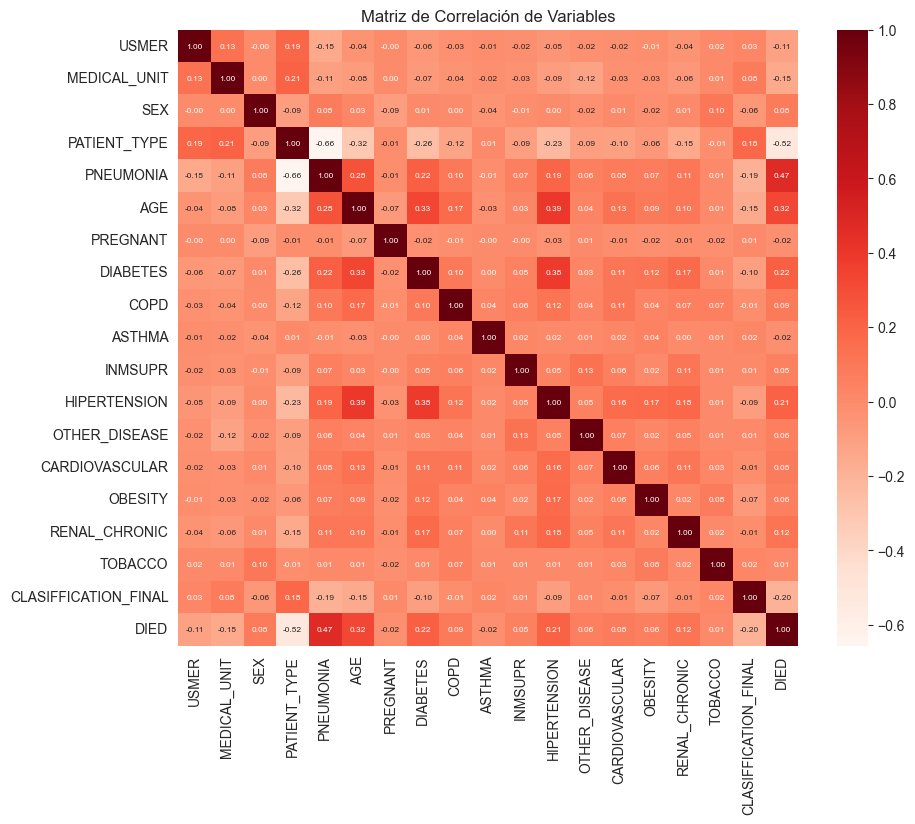

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, cmap='Reds', annot=True, fmt=".2f", annot_kws={'size': 6})
plt.title('Matriz de Correlación de Variables')
plt.show()

In [21]:
# GUARDAR DF EN UN CSV

df.to_csv("./clean_covid_data.csv")

## Separar Entrenamiento y Test

In [22]:
from sklearn.model_selection import train_test_split

y = df['DIED']
X = df.drop('DIED', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Entrenar Modelos

In [23]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

def metrics(y_test, y_pred, y_pred_proba):
    cm = confusion_matrix(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    auc = roc_auc_score(y_test, y_pred_proba[:, 1])

    print("Matriz de Confusión:")
    print(cm)
    print(f"Precisión (Precision): {prec:.4f}")
    print(f"Sensibilidad (Recall): {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}" )

Probaré con **Regresión Logística**

In [24]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=100000000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)
metrics(y_test, y_pred, y_pred_proba)

Matriz de Confusión:
[[283937   6661]
 [ 13033  10005]]
Precisión (Precision): 0.6003
Sensibilidad (Recall): 0.4343
F1-Score: 0.5040
AUC-ROC: 0.9533
Accuracy Score: 0.9372


Probaré **Random Forest**

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)
metrics(y_test, y_pred, y_pred_proba)

Matriz de Confusión:
[[282125   8473]
 [ 11901  11137]]
Precisión (Precision): 0.5679
Sensibilidad (Recall): 0.4834
F1-Score: 0.5223
AUC-ROC: 0.9362
Accuracy Score: 0.9350


Probaré **arboles de decisión**

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)
metrics(y_test, y_pred, y_pred_proba)

Matriz de Confusión:
[[281542   9056]
 [ 12692  10346]]
Precisión (Precision): 0.5332
Sensibilidad (Recall): 0.4491
F1-Score: 0.4876
AUC-ROC: 0.8219
Accuracy Score: 0.9307


Voy a balancearlos con SMOTE (Synthetic Minority Oversampling Technique) y hacer submuestreo con ENN (Edited Nearest Neighbors)

In [27]:
from imblearn.combine import SMOTEENN

smote = SMOTEENN(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [28]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=100000000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)
metrics(y_test, y_pred, y_pred_proba)

Matriz de Confusión:
[[257423  33175]
 [  1643  21395]]
Precisión (Precision): 0.3921
Sensibilidad (Recall): 0.9287
F1-Score: 0.5514
AUC-ROC: 0.9525
Accuracy Score: 0.8890


In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)
metrics(y_test, y_pred, y_pred_proba)

Matriz de Confusión:
[[269324  21274]
 [  5099  17939]]
Precisión (Precision): 0.4575
Sensibilidad (Recall): 0.7787
F1-Score: 0.5763
AUC-ROC: 0.9159
Accuracy Score: 0.9159


In [30]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)
metrics(y_test, y_pred, y_pred_proba)

Matriz de Confusión:
[[269783  20815]
 [  5682  17356]]
Precisión (Precision): 0.4547
Sensibilidad (Recall): 0.7534
F1-Score: 0.5671
AUC-ROC: 0.8409
Accuracy Score: 0.9155


### GridSearchCV

Probaré **GridSearchCV**. Me ayuda a encontra la mejor combinación de parametros para el modelo que escoja.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params =  {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
best_rf = grid_search.best_estimator_

print("Mejores Hiperparámetros:", grid_search.best_params_)
print("Mejor Score de Validación:", grid_search.best_score_)

In [ ]:
y_pred = best_rf.predict(X_test)

In [ ]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)